In [3]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset

In [4]:
model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", top_k=3)
result = model("I hate you")[0]
print(result)

[{'label': 'LABEL_0', 'score': 0.965427041053772}, {'label': 'LABEL_1', 'score': 0.028996318578720093}, {'label': 'LABEL_2', 'score': 0.005576656199991703}]


In [5]:
from model.SentimentAnalyser import SentimentAnalyser

sentiment_analysis = SentimentAnalyser()
result = sentiment_analysis.predict("I hate you")
print(result)

{'negative': 0.965427041053772, 'neutral': 0.028996318578720093, 'positive': 0.005576656199991703}


In [6]:
# download the Stanford Sentiment Treebank Dataset
dataset = load_dataset("glue", "sst2")

print(len(dataset["train"]))
print(dataset["train"][:5])

Reusing dataset glue (/Users/pandermatt/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

67349
{'sentence': ['hide new secretions from the parental units ', 'contains no wit , only labored gags ', 'that loves its characters and communicates something rather beautiful about human nature ', 'remains utterly satisfied to remain the same throughout ', 'on the worst revenge-of-the-nerds clichés the filmmakers could dredge up '], 'label': [0, 0, 1, 0, 0], 'idx': [0, 1, 2, 3, 4]}


In [7]:
print(set(dataset["train"]["label"]))

{0, 1}


In [8]:
result = sentiment_analysis.predict(dataset["train"][0]["sentence"])
print(result)
print(dataset["train"][0]["label"])

{'neutral': 0.6850253343582153, 'negative': 0.28855881094932556, 'positive': 0.026415809988975525}
0


In [9]:
# number of rows in the dataset
print(dataset["train"].features)
# number of unique sentiments in the dataset
print(len(dataset["train"]))
# number of rows for each sentiment in the dataset
print(set(dataset["train"]["label"]))

{'sentence': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=2, names=['negative', 'positive'], id=None), 'idx': Value(dtype='int32', id=None)}
67349
{0, 1}


In [10]:
print(dataset["train"][:3])

{'sentence': ['hide new secretions from the parental units ', 'contains no wit , only labored gags ', 'that loves its characters and communicates something rather beautiful about human nature '], 'label': [0, 0, 1], 'idx': [0, 1, 2]}


In [11]:
y_true = []
y_pred = []
i = 0
for row in dataset["train"]:
    if i == 300:
        break
    i += 1
    result = sentiment_analysis.predict(row["sentence"])
    if row["label"] == 0:
        y_true.append("negative")
    elif row["label"] == 1:
        y_true.append("positive")
    else:
        print("error")
        break
    y_pred.append(max(result, key=result.get))

print(y_true)
print(y_pred)

['negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'po

In [12]:
print(accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

0.55
              precision    recall  f1-score   support

    negative       0.91      0.62      0.74       149
     neutral       0.00      0.00      0.00         0
    positive       0.92      0.48      0.63       151

    accuracy                           0.55       300
   macro avg       0.61      0.37      0.46       300
weighted avg       0.92      0.55      0.68       300



/opt/homebrew/Caskroom/miniforge/base/envs/conda-m1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda-m1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda-m1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

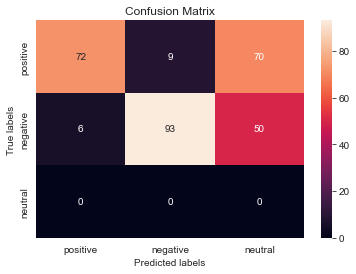

In [13]:
cm = confusion_matrix(y_true, y_pred, labels=["positive", "negative", "neutral"])

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d")

ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["positive", "negative", "neutral"])
ax.yaxis.set_ticklabels(["positive", "negative", "neutral"])
plt.show()